In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

import matplotlib as mpl
mpl.rcParams['font.serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
ppi_all = pd.read_excel('/f/zhangwenwen/project/COVID-19/source/PPI/PPI_all.xlsx')

In [3]:
ppi_all['Virus'].value_counts()

SARS-CoV2    1427
SARS-CoV     1055
MERS-CoV      296
Name: Virus, dtype: int64

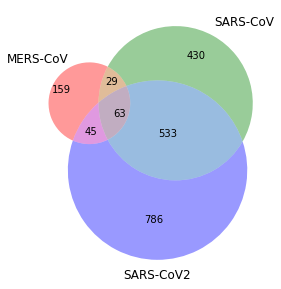

In [4]:
list_a = ppi_all[ppi_all['Virus']=='MERS-CoV']['Host Gene'].values
list_b = ppi_all[ppi_all['Virus']=='SARS-CoV']['Host Gene'].values
list_c = ppi_all[ppi_all['Virus']=='SARS-CoV2']['Host Gene'].values

f, ax = plt.subplots( figsize=(5,5))
venn3([set(list_a),set(list_b),set(list_c)],
      ax=ax,
      set_colors=('r','g', 'b'),
      set_labels=('MERS-CoV', 'SARS-CoV','SARS-CoV2'),)

# Map directions

## MERS-Cov

In [5]:
merscov = ppi_all[ppi_all['Virus']=='MERS-CoV']
print(len(merscov))

296


### GSE122876

In [6]:
GSE122876 = pd.read_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/DEGs/MERS-CoV_GSE122876_all.xlsx')
GSE122876 = GSE122876[(GSE122876['padj'] <= 0.05) & (
    (GSE122876['log2FoldChange'] >= 1) | (GSE122876['log2FoldChange'] <= -1))]
print(len(GSE122876))

1367


In [7]:
merscov_GSE122876 = merscov.merge(GSE122876,
                                  left_on='Host Gene',
                                  right_on='Symbol',
                                  how='left')
print(len(merscov_GSE122876[merscov_GSE122876['Symbol'].notnull()]))

36


In [8]:
merscov_GSE122876['Direction'] = merscov_GSE122876[
    'log2FoldChange'] / merscov_GSE122876['log2FoldChange'].abs()
merscov_GSE122876.loc[merscov_GSE122876['Direction'].notnull(),'Direciton Type'] = 'DEG'
merscov_GSE122876.loc[merscov_GSE122876['Direction'].notnull(),'Direction Source'] = 'GSE122876'

In [9]:
merscov_GSE122876 = merscov_GSE122876[[
    'Virus', 'Host Gene', 'Host Gene Type', 'Host Gene Source', 'Direction',
    'Direciton Type', 'Direction Source'
]]

In [10]:
merscov_GSE122876

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,MERS-CoV,SPTLC2,AP-MS,33060197,-1.0,DEG,GSE122876
1,MERS-CoV,B4GAT1,AP-MS,33060197,NaN,NaN,NaN
2,MERS-CoV,ATP6AP2,AP-MS,33060197,-1.0,DEG,GSE122876
3,MERS-CoV,IGHG4,AP-MS,33060197,NaN,NaN,NaN
4,MERS-CoV,WLS,AP-MS,33060197,NaN,NaN,NaN
...,...,...,...,...,...,...,...
291,MERS-CoV,CLCC1,AP-MS,33060197,NaN,NaN,NaN
292,MERS-CoV,DPP4,Other,28643204,NaN,NaN,NaN
293,MERS-CoV,CD9,Other,28759649,-1.0,DEG,GSE122876
294,MERS-CoV,TMPRSS2,Other,28759649,NaN,NaN,NaN


## SARS-Cov

In [11]:
sarscov = ppi_all[ppi_all['Virus']=='SARS-CoV']
print(len(sarscov))

1055


### GSE59185

In [12]:
GSE59185 = pd.read_csv('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/DEGs/SARS-CoV_GSE59185.top.table.tsv',sep='\t')
GSE59185 = GSE59185[(GSE59185['adj.P.Val'] <= 0.05) & (
    (GSE59185['logFC'] >= 1) | (GSE59185['logFC'] <= -1))]
GSE59185['GENE_SYMBOL'] = GSE59185['GENE_SYMBOL'].str.upper()
GSE59185 = GSE59185.drop_duplicates('GENE_SYMBOL')
print(len(GSE59185))

2495


In [13]:
GSE59185[:2]

,ID,adj.P.Val,P.Value,t,B,logFC,SPOT_ID,GB_ACC,GENE_SYMBOL,SEQUENCE
0,37395,0.000001,1.680000e-11,-64.9,14.94059,-9.11,NaN,NM_021274,CXCL10,GCTTTGCATTGTATATGGAAGAACTTGTGTCATCAAGTATGTATCA...
1,32046,0.000002,9.000000e-11,-51.7,14.15371,-6.00,NaN,NM_134102,PLA1A,TCTAACGCTTTACATAAATGCCCTTTTAGCTTCTCTATTTCGACAC...


In [14]:
sarscov_GSE59185 = sarscov.merge(GSE59185,
                                 left_on='Host Gene',
                                 right_on='GENE_SYMBOL',
                                 how='left')
print(len(sarscov_GSE59185[sarscov_GSE59185['GENE_SYMBOL'].notnull()]))
sarscov_GSE59185['Direction'] = sarscov_GSE59185['logFC'] / sarscov_GSE59185[
    'logFC'].abs() * -1
sarscov_GSE59185.loc[sarscov_GSE59185['Direction'].notnull(),
                     'Direciton Type'] = 'DEG'
sarscov_GSE59185.loc[sarscov_GSE59185['Direction'].notnull(),
                     'Direction Source'] = 'GSE59185'
sarscov_GSE59185 = sarscov_GSE59185[[
    'Virus', 'Host Gene', 'Host Gene Type', 'Host Gene Source', 'Direction',
    'Direciton Type', 'Direction Source'
]]

99


In [15]:
sarscov_GSE59185

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV,UFD1,AP-MS,2020.06.17.156455,NaN,NaN,NaN
1,SARS-CoV,NPLOC4,AP-MS,2020.06.17.156455,NaN,NaN,NaN
2,SARS-CoV,SARS_CoV_E,AP-MS,2020.06.17.156455,NaN,NaN,NaN
3,SARS-CoV,RAB34,AP-MS,2020.06.17.156455,NaN,NaN,NaN
4,SARS-CoV,FAM241B,AP-MS,2020.06.17.156455,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1050,SARS-CoV,AGO1,STRING.Viruses,STRING Viruses,NaN,NaN,NaN
1051,SARS-CoV,CD79A,STRING.Viruses,STRING Viruses,-1.0,DEG,GSE59185
1052,SARS-CoV,MYO5C,STRING.Viruses,STRING Viruses,-1.0,DEG,GSE59185
1053,SARS-CoV,TBXT,STRING.Viruses,STRING Viruses,NaN,NaN,NaN


### GSE33267

In [16]:
GSE33267 = pd.read_csv('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/DEGs/SARS-CoV_GSE33267_MOCK72H_DORF672H.top.table.tsv',sep='\t')
GSE33267 = GSE33267[(GSE33267['adj.P.Val'] <= 0.05) & (
    (GSE33267['logFC'] >= 1) | (GSE33267['logFC'] <= -1))]
GSE33267 = GSE33267.drop_duplicates('Gene.symbol')
print(len(GSE33267))

5553


In [17]:
sarscov_GSE33267 = sarscov.merge(GSE33267,
                                 left_on='Host Gene',
                                 right_on='Gene.symbol',
                                 how='left')
print(len(sarscov_GSE33267[sarscov_GSE33267['Gene.symbol'].notnull()]))
sarscov_GSE33267['Direction'] = sarscov_GSE33267[
    'logFC'] / sarscov_GSE33267['logFC'].abs()
sarscov_GSE33267.loc[sarscov_GSE33267['Direction'].notnull(),
                      'Direciton Type'] = 'DEG'
sarscov_GSE33267.loc[sarscov_GSE33267['Direction'].notnull(),
                      'Direction Source'] = 'GSE33267'
sarscov_GSE33267 = sarscov_GSE33267[[
    'Virus', 'Host Gene', 'Host Gene Type', 'Host Gene Source', 'Direction',
    'Direciton Type', 'Direction Source'
]]

285


In [18]:
sarscov_GSE33267

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV,UFD1,AP-MS,2020.06.17.156455,NaN,NaN,NaN
1,SARS-CoV,NPLOC4,AP-MS,2020.06.17.156455,NaN,NaN,NaN
2,SARS-CoV,SARS_CoV_E,AP-MS,2020.06.17.156455,NaN,NaN,NaN
3,SARS-CoV,RAB34,AP-MS,2020.06.17.156455,NaN,NaN,NaN
4,SARS-CoV,FAM241B,AP-MS,2020.06.17.156455,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1050,SARS-CoV,AGO1,STRING.Viruses,STRING Viruses,NaN,NaN,NaN
1051,SARS-CoV,CD79A,STRING.Viruses,STRING Viruses,NaN,NaN,NaN
1052,SARS-CoV,MYO5C,STRING.Viruses,STRING Viruses,NaN,NaN,NaN
1053,SARS-CoV,TBXT,STRING.Viruses,STRING Viruses,NaN,NaN,NaN


## SARS-Cov2

In [19]:
sarscov2 = ppi_all[ppi_all['Virus']=='SARS-CoV2']
print(len(sarscov2))

1427


### GSE152586

In [20]:
GSE152586 = pd.read_csv('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/DEGs/SARS-CoV2_GSE152586_iDEP.csv')
GSE152586 = GSE152586[(GSE152586['adj-P-Val'] <= 0.05) & (
    (GSE152586['logFC'] >= 1) | (GSE152586['logFC'] <= -1))]
GSE152586 = GSE152586.drop_duplicates('Symbol')
print(len(GSE152586))

1389


In [21]:
sarscov2_GSE152586 = sarscov2.merge(GSE152586,
                                 left_on='Host Gene',
                                 right_on='Symbol',
                                 how='left')
print(len(sarscov2_GSE152586[sarscov2_GSE152586['Symbol'].notnull()]))
sarscov2_GSE152586['Direction'] = sarscov2_GSE152586[
    'logFC'] / sarscov2_GSE152586['logFC'].abs()
sarscov2_GSE152586.loc[sarscov2_GSE152586['Direction'].notnull(),
                      'Direciton Type'] = 'DEG'
sarscov2_GSE152586.loc[sarscov2_GSE152586['Direction'].notnull(),
                      'Direction Source'] = 'GSE152586'
sarscov2_GSE152586 = sarscov2_GSE152586[[
    'Virus', 'Host Gene', 'Host Gene Type', 'Host Gene Source', 'Direction',
    'Direciton Type', 'Direction Source'
]]

114


In [22]:
sarscov2_GSE152586

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV2,NUP155,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
1,SARS-CoV2,STUB1,AP-MS,"2020.06.17.156455,j.medj.2020.07.002",-1.0,DEG,GSE152586
2,SARS-CoV2,XPO4,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
3,SARS-CoV2,IPO11,AP-MS,"2020.06.17.156455,j.medj.2020.07.002",NaN,NaN,NaN
4,SARS-CoV2,EXOC7,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1422,SARS-CoV2,SSX2IP,AP-MS,33060197,NaN,NaN,NaN
1423,SARS-CoV2,SIK3,AP-MS,33060197,1.0,DEG,GSE152586
1424,SARS-CoV2,COMMD10,AP-MS,33060197,NaN,NaN,NaN
1425,SARS-CoV2,RNPC3,AP-MS,33060197,NaN,NaN,NaN


### GSE171430

In [23]:
GSE171430 = pd.read_csv('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/DEGs/SARS-CoV2_GSE171430_iDEP.csv')
GSE171430 = GSE171430[(GSE152586['adj-P-Val'] <= 0.05) & (
    (GSE171430['logFC'] >= 1) | (GSE171430['logFC'] <= -1))]
GSE171430 = GSE171430.drop_duplicates('Symbol')
print(len(GSE171430))

48


<ipython-input-23-49226b5e7e29>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GSE171430 = GSE171430[(GSE152586['adj-P-Val'] <= 0.05) & (


In [24]:
sarscov2_GSE171430 = sarscov2.merge(GSE171430,
                                 left_on='Host Gene',
                                 right_on='Symbol',
                                 how='left')
print(len(sarscov2_GSE171430[sarscov2_GSE171430['Symbol'].notnull()]))
sarscov2_GSE171430['Direction'] = sarscov2_GSE171430[
    'logFC'] / sarscov2_GSE171430['logFC'].abs()
sarscov2_GSE171430.loc[sarscov2_GSE171430['Direction'].notnull(),
                      'Direciton Type'] = 'DEG'
sarscov2_GSE171430.loc[sarscov2_GSE171430['Direction'].notnull(),
                      'Direction Source'] = 'GSE171430'
sarscov2_GSE171430 = sarscov2_GSE171430[[
    'Virus', 'Host Gene', 'Host Gene Type', 'Host Gene Source', 'Direction',
    'Direciton Type', 'Direction Source'
]]

0


In [25]:
sarscov2_GSE171430

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV2,NUP155,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
1,SARS-CoV2,STUB1,AP-MS,"2020.06.17.156455,j.medj.2020.07.002",NaN,NaN,NaN
2,SARS-CoV2,XPO4,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
3,SARS-CoV2,IPO11,AP-MS,"2020.06.17.156455,j.medj.2020.07.002",NaN,NaN,NaN
4,SARS-CoV2,EXOC7,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1422,SARS-CoV2,SSX2IP,AP-MS,33060197,NaN,NaN,NaN
1423,SARS-CoV2,SIK3,AP-MS,33060197,NaN,NaN,NaN
1424,SARS-CoV2,COMMD10,AP-MS,33060197,NaN,NaN,NaN
1425,SARS-CoV2,RNPC3,AP-MS,33060197,NaN,NaN,NaN


### GSE166990

In [26]:
GSE166990 = pd.read_csv('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/DEGs/SARS-CoV2_GSE166990_iDEP.csv')
GSE166990 = GSE166990[(GSE166990['adj-P-Val'] <= 0.05) & (
    (GSE166990['logFC'] >= 1) | (GSE166990['logFC'] <= -1))]
GSE166990 = GSE166990.drop_duplicates('Symbol')
print(len(GSE166990))

29


In [27]:
sarscov2_GSE166990 = sarscov2.merge(GSE166990,
                                 left_on='Host Gene',
                                 right_on='Symbol',
                                 how='left')
print(len(sarscov2_GSE166990[sarscov2_GSE166990['Symbol'].notnull()]))
sarscov2_GSE166990['Direction'] = sarscov2_GSE166990[
    'logFC'] / sarscov2_GSE166990['logFC'].abs()
sarscov2_GSE166990.loc[sarscov2_GSE166990['Direction'].notnull(),
                      'Direciton Type'] = 'DEG'
sarscov2_GSE166990.loc[sarscov2_GSE166990['Direction'].notnull(),
                      'Direction Source'] = 'GSE171430'
sarscov2_GSE166990 = sarscov2_GSE166990[[
    'Virus', 'Host Gene', 'Host Gene Type', 'Host Gene Source', 'Direction',
    'Direciton Type', 'Direction Source'
]]

5


In [28]:
sarscov2_GSE166990

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV2,NUP155,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
1,SARS-CoV2,STUB1,AP-MS,"2020.06.17.156455,j.medj.2020.07.002",NaN,NaN,NaN
2,SARS-CoV2,XPO4,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
3,SARS-CoV2,IPO11,AP-MS,"2020.06.17.156455,j.medj.2020.07.002",NaN,NaN,NaN
4,SARS-CoV2,EXOC7,AP-MS,j.medj.2020.07.002,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1422,SARS-CoV2,SSX2IP,AP-MS,33060197,NaN,NaN,NaN
1423,SARS-CoV2,SIK3,AP-MS,33060197,NaN,NaN,NaN
1424,SARS-CoV2,COMMD10,AP-MS,33060197,NaN,NaN,NaN
1425,SARS-CoV2,RNPC3,AP-MS,33060197,NaN,NaN,NaN


# Merge

## used direction source

### MERS-CoV: GSE122876, SARS-CoV: GSE33267, SARS-CoV2: GSE152586

In [29]:
all_ppi_DEG = pd.concat([merscov_GSE122876,sarscov_GSE33267,sarscov2_GSE152586],ignore_index=True)

In [30]:
all_ppi_DEG.to_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/PPI_allsource_DEG.xlsx',index=False)

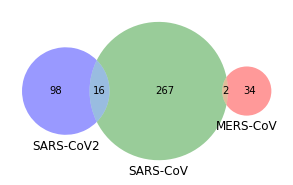

In [31]:
ppi_all = pd.read_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/PPI/PPI_allsource_DEG.xlsx')
ppi_all = ppi_all[ppi_all['Direction'].notnull()]
list_a = ppi_all[ppi_all['Virus']=='MERS-CoV']['Host Gene'].values
list_b = ppi_all[ppi_all['Virus']=='SARS-CoV']['Host Gene'].values
list_c = ppi_all[ppi_all['Virus']=='SARS-CoV2']['Host Gene'].values

f, ax = plt.subplots( figsize=(5,5))
venn3([set(list_a),set(list_b),set(list_c)],
      ax=ax,
      set_colors=('r','g', 'b'),
      set_labels=('MERS-CoV', 'SARS-CoV','SARS-CoV2'),)

# all_source

In [32]:
all_source = pd.read_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/all_source_new.xlsx')

In [33]:
all_source['Virus'].value_counts()

SARS-CoV2    2296
SARS-CoV     1255
MERS-CoV      621
Name: Virus, dtype: int64

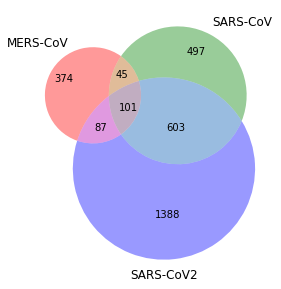

In [34]:
list_a = all_source[all_source['Virus']=='MERS-CoV']['Host Gene'].values
list_b = all_source[all_source['Virus']=='SARS-CoV']['Host Gene'].values
list_c = all_source[all_source['Virus']=='SARS-CoV2']['Host Gene'].values

f, ax = plt.subplots( figsize=(5,5))
venn3([set(list_a),set(list_b),set(list_c)],
      ax=ax,
      set_colors=('r','g', 'b'),
      set_labels=('MERS-CoV', 'SARS-CoV','SARS-CoV2'),)

MERS-CoV
SARS-CoV
SARS-CoV2


/f/zhangwenwen/anaconda3/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


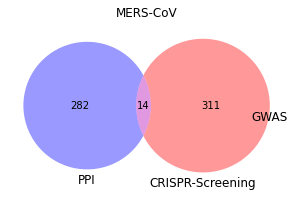

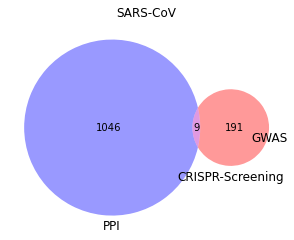

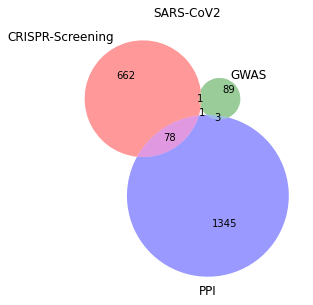

In [35]:
for virus in ['MERS-CoV','SARS-CoV','SARS-CoV2']:
    virus_genes = all_source[all_source['Virus']==virus]
    list_a = virus_genes[virus_genes['Host Gene Type']=='CRISPR-Screening']['Host Gene'].values
    list_b = virus_genes[virus_genes['Host Gene Type']=='GWAS']['Host Gene'].values
    list_c = virus_genes[virus_genes['Host Gene Type'].isin(['Other','AP-MS','STRING.Viruses'])]['Host Gene'].values
    print(virus)
    f, ax = plt.subplots( figsize=(5,5))
    venn3([set(list_a),set(list_b),set(list_c)],
          ax=ax,
          set_colors=('r','g', 'b'),
          set_labels=('CRISPR-Screening', 'GWAS','PPI'),)
    ax.set_title(virus)

# All host genes with known direction

In [36]:
all_source_direction = all_source.drop(all_source[(all_source['Direction']==0)].index)
all_source_direction = all_source_direction.dropna(subset=['Direction'])

In [37]:
all_source_direction

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV2,CCR9,GWAS,COVID19GRASP489,1.0,eQTL,gtex_v8
1,SARS-CoV2,FLT1P1,GWAS,COVID19GRASP489,-1.0,eQTL,gtex_v8
2,SARS-CoV2,CCR3,GWAS,COVID19GRASP488,-1.0,eQTL,gtex_v8
3,SARS-CoV2,CXCR6,GWAS,COVID19GRASP488,-1.0,eQTL,gtex_v8
4,SARS-CoV2,CCR5,GWAS,COVID19GRASP488,-1.0,eQTL,gtex_v8
...,...,...,...,...,...,...,...
4132,SARS-CoV2,DNA2,AP-MS,33060197,-1.0,DEG,GSE152586
4139,SARS-CoV2,CEP55,AP-MS,33060197,-1.0,DEG,GSE152586
4143,SARS-CoV2,LRCH2,AP-MS,33060197,1.0,DEG,GSE152586
4164,SARS-CoV2,USP25,AP-MS,33060197,1.0,DEG,GSE152586


In [38]:
all_source_direction.to_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/all_source_direction.xlsx',index=False)

In [39]:
all_source = pd.read_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/all_source_direction.xlsx')

In [40]:
all_source['Virus'].value_counts()

SARS-CoV2    981
SARS-CoV     485
MERS-CoV     361
Name: Virus, dtype: int64

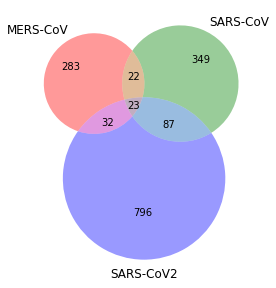

In [41]:
list_a = all_source[all_source['Virus']=='MERS-CoV']['Host Gene'].values
list_b = all_source[all_source['Virus']=='SARS-CoV']['Host Gene'].values
list_c = all_source[all_source['Virus']=='SARS-CoV2']['Host Gene'].values

f, ax = plt.subplots( figsize=(5,5))
venn3([set(list_a),set(list_b),set(list_c)],
      ax=ax,
      set_colors=('r','g', 'b'),
      set_labels=('MERS-CoV', 'SARS-CoV','SARS-CoV2'),)

MERS-CoV
SARS-CoV
SARS-CoV2


/f/zhangwenwen/anaconda3/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


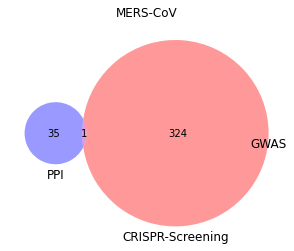

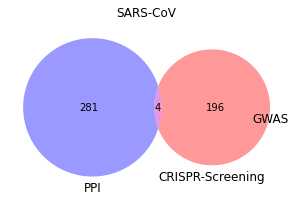

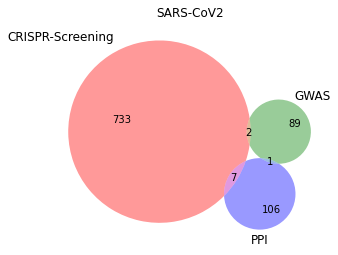

In [42]:
for virus in ['MERS-CoV','SARS-CoV','SARS-CoV2']:
    virus_genes = all_source[all_source['Virus']==virus]
    list_a = virus_genes[virus_genes['Host Gene Type']=='CRISPR-Screening']['Host Gene'].values
    list_b = virus_genes[virus_genes['Host Gene Type']=='GWAS']['Host Gene'].values
    list_c = virus_genes[virus_genes['Host Gene Type'].isin(['Other','AP-MS','STRING.Viruses'])]['Host Gene'].values
    print(virus)
    f, ax = plt.subplots( figsize=(5,5))
    venn3([set(list_a),set(list_b),set(list_c)],
          ax=ax,
          set_colors=('r','g', 'b'),
          set_labels=('CRISPR-Screening', 'GWAS','PPI'),)
    ax.set_title(virus)

In [43]:
counts = all_source[['Virus','Host Gene']].value_counts()

In [44]:
counts = counts[counts>1]

In [45]:
type(counts)

pandas.core.series.Series

In [46]:
counts.index

MultiIndex([('SARS-CoV2',        'ACE2'),
            ('SARS-CoV2',        'CTSL'),
            ('SARS-CoV2',       'ARPC4'),
            ('SARS-CoV2',    'KIAA1033'),
            ( 'SARS-CoV',       'USP34'),
            ('SARS-CoV2',       'RAB7A'),
            ('SARS-CoV2',       'CCZ1B'),
            ('SARS-CoV2',        'PHIP'),
            ('SARS-CoV2',       'ASXL1'),
            ('SARS-CoV2',     'PYROXD1'),
            ('SARS-CoV2',       'WDR91'),
            ('SARS-CoV2',     'ATP6AP1'),
            ('SARS-CoV2',        'SCLY'),
            ('SARS-CoV2',     'ATP6V0C'),
            ('SARS-CoV2',       'HLA-C'),
            ('SARS-CoV2',       'DTYMK'),
            ('SARS-CoV2',       'DSTYK'),
            ('SARS-CoV2',       'VPS35'),
            ('SARS-CoV2',       'VPS29'),
            ('SARS-CoV2',      'CCDC22'),
            ( 'MERS-CoV',     'SPTY2D1'),
            ('SARS-CoV2',       'KEAP1'),
            ('SARS-CoV2',      'CCDC93'),
            ('SARS-CoV2',       'N

In [47]:
all_source

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV2,CCR9,GWAS,COVID19GRASP489,1,eQTL,gtex_v8
1,SARS-CoV2,FLT1P1,GWAS,COVID19GRASP489,-1,eQTL,gtex_v8
2,SARS-CoV2,CCR3,GWAS,COVID19GRASP488,-1,eQTL,gtex_v8
3,SARS-CoV2,CXCR6,GWAS,COVID19GRASP488,-1,eQTL,gtex_v8
4,SARS-CoV2,CCR5,GWAS,COVID19GRASP488,-1,eQTL,gtex_v8
...,...,...,...,...,...,...,...
1822,SARS-CoV2,DNA2,AP-MS,33060197,-1,DEG,GSE152586
1823,SARS-CoV2,CEP55,AP-MS,33060197,-1,DEG,GSE152586
1824,SARS-CoV2,LRCH2,AP-MS,33060197,1,DEG,GSE152586
1825,SARS-CoV2,USP25,AP-MS,33060197,1,DEG,GSE152586


In [48]:
for i in counts.index:
    a = all_source[(all_source['Virus']==i[0])&(all_source['Host Gene']==i[1])]
    if len(a['Direction'].value_counts()) >1:
        print(i)
        all_source = all_source[~((all_source['Virus']==i[0])&(all_source['Host Gene']==i[1]))]

('SARS-CoV2', 'ARPC4')
('SARS-CoV2', 'ATP6AP1')
('SARS-CoV2', 'ATP6V0C')
('SARS-CoV2', 'PLIN2')
('SARS-CoV2', 'HMOX2')
('SARS-CoV', 'LRRC47')
('SARS-CoV2', 'RPS11')
('SARS-CoV', 'RYBP')
('SARS-CoV2', 'PGAP2')


In [49]:
len(a['Direction'].value_counts())

2

In [50]:
a

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
465,SARS-CoV2,PGAP2,CRISPR-Screening,s41588-021-00805-2,1,CRISPR-Screening,s41588-021-00805-2
1124,SARS-CoV2,PGAP2,CRISPR-Screening,10.1016/j.cell.2020.10.028,-1,CRISPR-Screening,10.1016/j.cell.2020.10.028


In [51]:
all_source['Virus'].value_counts()

SARS-CoV2    966
SARS-CoV     481
MERS-CoV     361
Name: Virus, dtype: int64

In [52]:
all_source.to_excel('/f/zhangwenwen/project/COVID-19/source_with_direction/all_knowdirection.xlsx',index=False)

In [53]:
for virus,sub_df in all_source.groupby('Host Gene'):
    if len(sub_df['Direction'].value_counts())>1:
        print(virus)
#     break

ACO1
AMBRA1
AP2M1
ATP6AP2
B4GAT1
BRI3BP
CCDC93
CD38
COMMD5
DNAJB1
ELOVL7
EXOSC5
EXT1
FAM162A
FITM2
HSPA1L
LAP3
MET
NT5C3A
PC
PCDH9
PFDN5
PHB
PLP2
SENP7
SLC30A1
SMAD3
STK40
TP53
TRAF3
TRIM4
TXNRD1
WDR26
